Proposal: https://docs.google.com/document/d/1q5UzcpCVvkFdkhunSt922mecs2CfjmE-jcSPQAujVi4/edit?pli=1 

Dataset: https://www.kaggle.com/datasets/moltean/fruits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
# !kaggle datasets download -d moltean/fruits -p "/content/drive/MyDrive/F1_Fruits360"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/kaggle. Or use the environment method.


In [ ]:
# !unzip /content/drive/MyDrive/F1_Fruits360/fruits.zip -d /content/drive/MyDrive/F1_Fruits360

Archive:  /content/drive/MyDrive/F1_Fruits360/fruits.zip
replace /content/drive/MyDrive/F1_Fruits360/fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_path = '/content/drive/MyDrive/F1_Fruits360/fruits-360-original-size/fruits-360-original-size/Training'
test_path = '/content/drive/MyDrive/F1_Fruits360/fruits-360-original-size/fruits-360-original-size/Test'
valid_path = '/content/drive/MyDrive/F1_Fruits360/fruits-360-original-size/fruits-360-original-size/Validation'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Augmentation & Image preprocessing parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_shape = (100, 100, 3)

In [ ]:
# Load the data using flow_from_directory method
%%capture

train_data = train_datagen.flow_from_directory(directory=train_path,
                                               target_size=img_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
valid_data = valid_datagen.flow_from_directory(directory=valid_path,
                                               target_size=img_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(directory=test_path,
                                             target_size=img_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


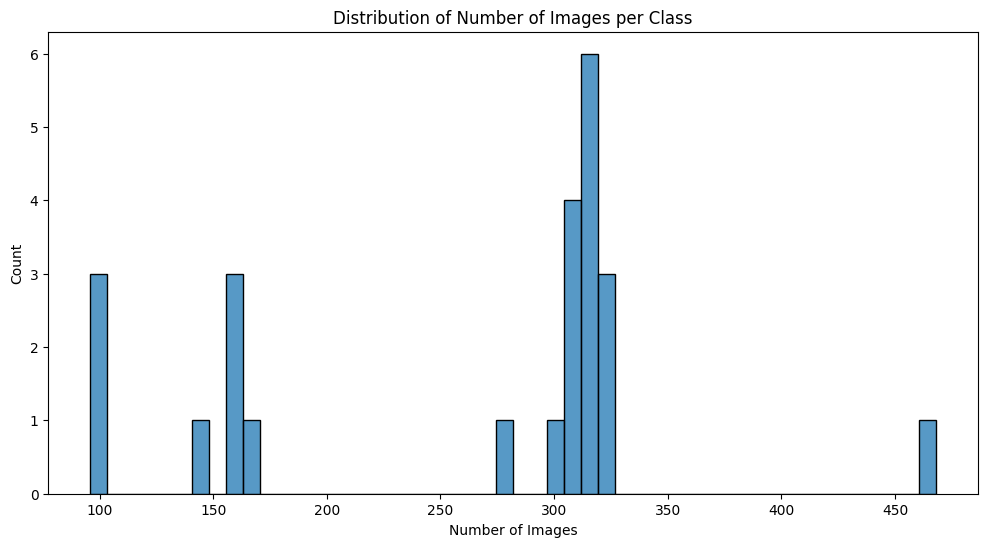

In [ ]:
# EDA

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define path to the dataset
data_dir = train_path

# Create a dictionary to store the number of images for each class
num_images = {}

# Iterate over each class directory and count the number of images
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        num_images[class_dir] = len(os.listdir(class_path))

# Convert the dictionary to a pandas dataframe and sort by the number of images
num_images_df = pd.DataFrame.from_dict(num_images, orient='index', columns=['num_images'])
num_images_df.sort_values(by='num_images', inplace=True, ascending=False)

# Plot the distribution of the number of images per class
plt.figure(figsize=(12,6))
sns.histplot(data=num_images_df, x='num_images', bins=50)
plt.title('Distribution of Number of Images per Class')
plt.xlabel('Number of Images')
plt.show()

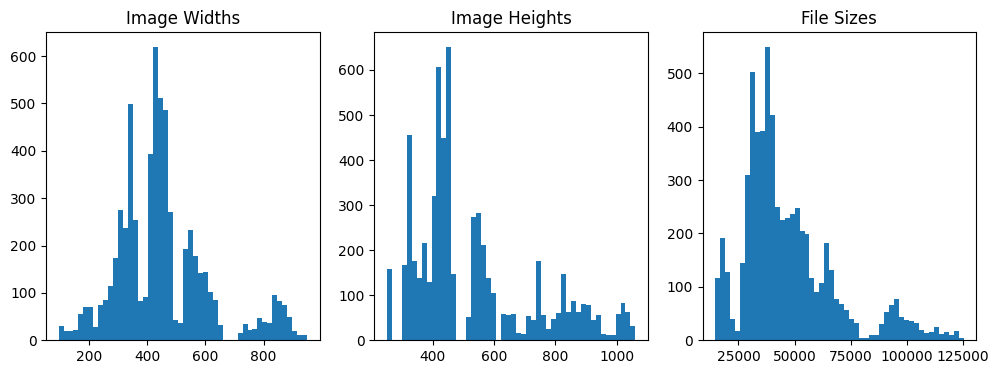

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set directory path where images are located
directory = '/content/drive/MyDrive/F1_Fruits360/fruits-360-original-size/fruits-360-original-size/Training'

# Get list of all image filenames in the directory
images = os.listdir(directory)


# Define empty lists for image dimensions and file sizes
widths = []
heights = []
file_sizes = []

# Loop over all subdirectories within the main directory
for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    
    # Only consider subdirectories containing image files
    if os.path.isdir(subdir_path):
        # Loop over images within each subdirectory
        for image in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, image)
            img = cv2.imread(img_path)
            if img is not None:
                height, width, _ = img.shape
                file_size = os.path.getsize(img_path)
                widths.append(width)
                heights.append(height)
                file_sizes.append(file_size)
            else:
                print(f"Failed to read image file: {img_path}")

# Plot histograms of image dimensions and file sizes
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(widths, bins=50)
ax[0].set_title("Image Widths")
ax[1].hist(heights, bins=50)
ax[1].set_title("Image Heights")
ax[2].hist(file_sizes, bins=50)
ax[2].set_title("File Sizes")
plt.show()


In [ ]:
def construct_fruits_dict(path):
    _dict = {}
    for fruit in os.listdir(path):
        _dict[fruit] = []
        for img in os.listdir(f'{path}/{fruit}'):
            _dict[fruit].append(f'{path}/{fruit}/{img}')
    return _dict

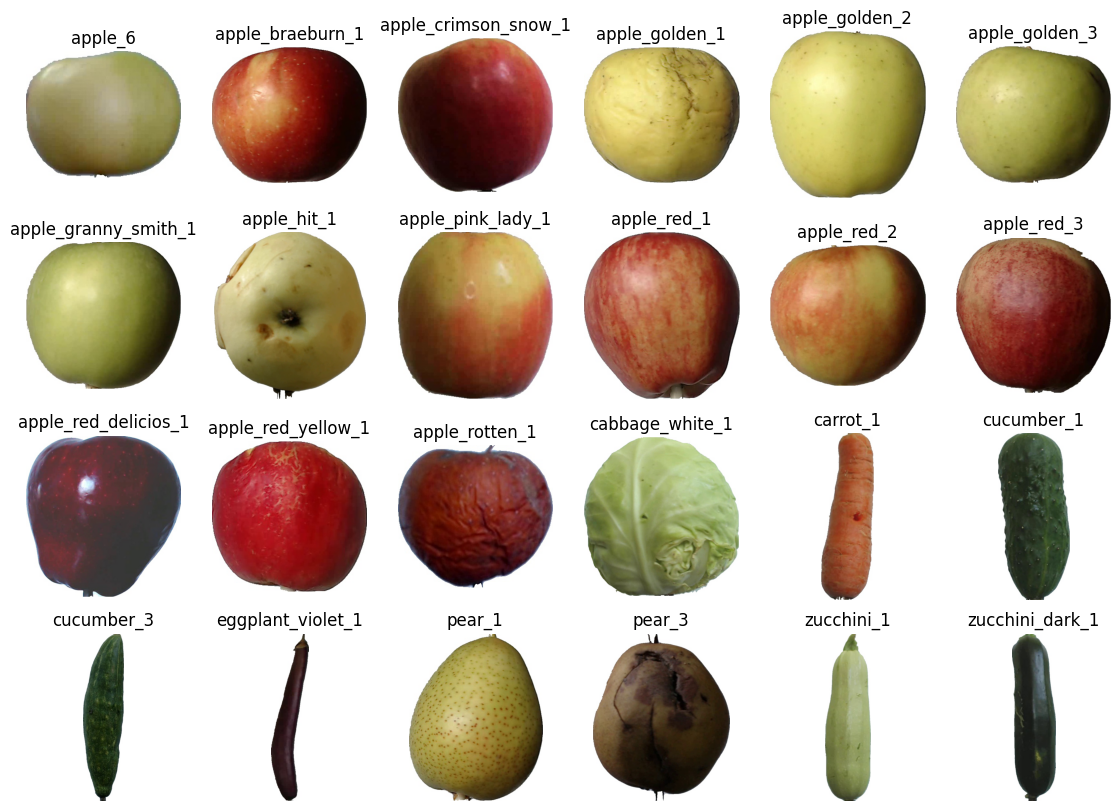

In [ ]:
training_dict = construct_fruits_dict(train_path)
test_dict = construct_fruits_dict(test_path)

fruits = list(training_dict.keys())[:24]

fig, axs = plt.subplots(4, 6, figsize=(14,10))
c = 0
for i in range(4):
    for j in range(6):
        if c >= 24:
            break
        f = fruits[c]
        img = plt.imread(training_dict[f][0])
        axs[i,j].set_title(f)
        axs[i,j].imshow(img)
        axs[i,j].axis('off')
        c += 1

In [ ]:
# CNN using transfer learning
base_model = keras.applications.VGG16(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.trainable = False
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(train_data.num_classes, activation='softmax')
])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=valid_data)

Epoch 1/10
195/195 [==============================] - 1812s 9s/step - loss: 0.9737 - accuracy: 0.6967 - val_loss: 0.6521 - val_accuracy: 0.7983
Epoch 2/10
195/195 [==============================] - 1248s 6s/step - loss: 0.6789 - accuracy: 0.7832 - val_loss: 0.4209 - val_accuracy: 0.8748
Epoch 3/10
195/195 [==============================] - 1251s 6s/step - loss: 0.5237 - accuracy: 0.8307 - val_loss: 0.3228 - val_accuracy: 0.9146
Epoch 4/10
195/195 [==============================] - 1200s 6s/step - loss: 0.4501 - accuracy: 0.8538 - val_loss: 0.2814 - val_accuracy: 0.9165
Epoch 5/10
195/195 [==============================] - 1164s 6s/step - loss: 0.3844 - accuracy: 0.8755 - val_loss: 0.2885 - val_accuracy: 0.9001
Epoch 6/10
195/195 [==============================] - 1164s 6s/step - loss: 0.3412 - accuracy: 0.8886 - val_loss: 0.1901 - val_accuracy: 0.9464
Epoch 7/10
195/195 [==============================] - 1226s 6s/step - loss: 0.3346 - accuracy: 0.8851 - val_loss: 0.1530 - val_accuracy:

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

98/98 [==============================] - 995s 10s/step - loss: 0.1157 - accuracy: 0.9768
Test accuracy: 0.9768489003181458


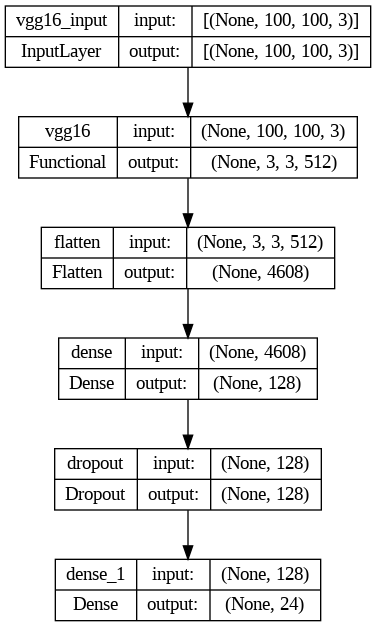

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_fruits_2.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
Total params: 15,307,736
Trainable params: 593,048
Non-trainable params: 14,714,688
_________________________________________________________________
None


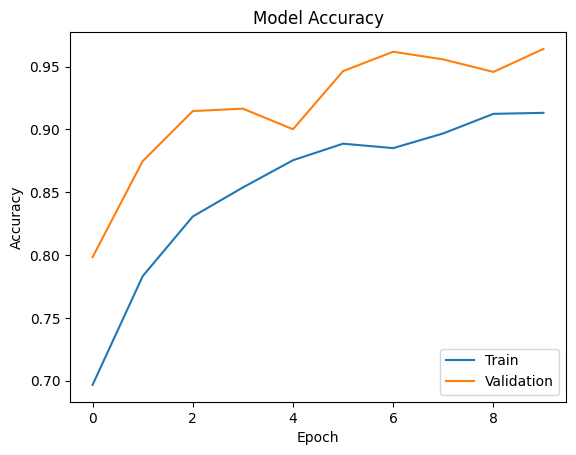

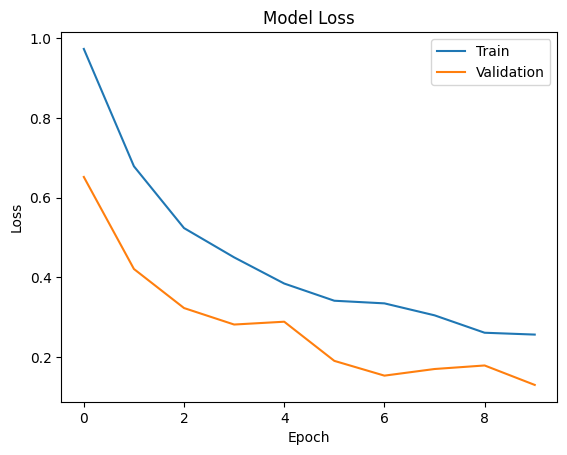

98/98 [==============================] - 416s 4s/step


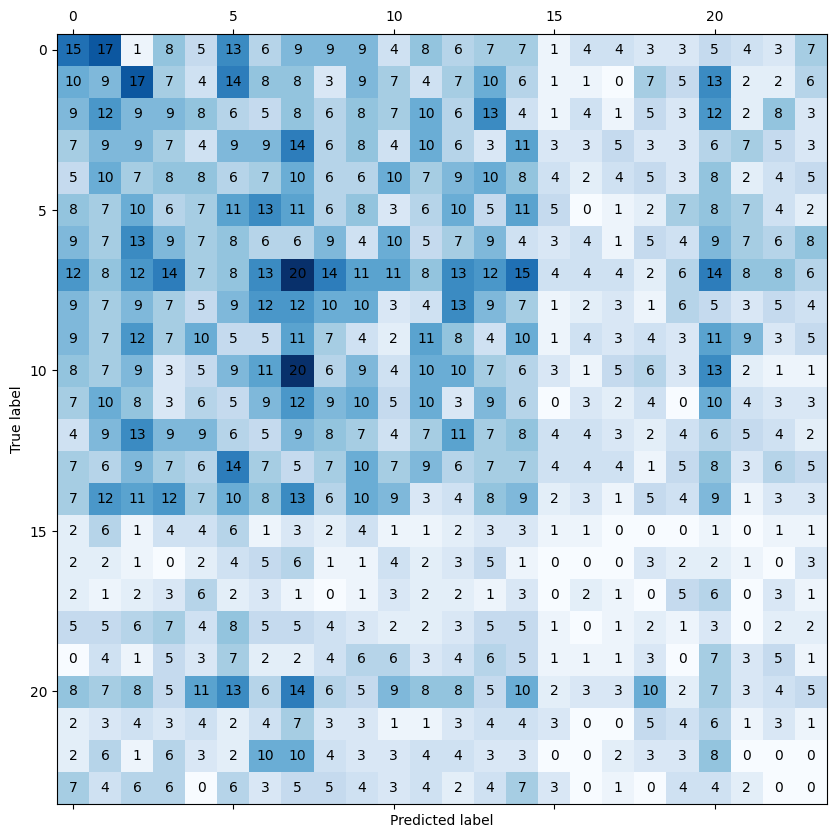

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict labels for validation set
y_pred = np.argmax(model.predict(valid_data), axis=1)
y_true = valid_data.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Hyperparameter Tuning

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-3-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
from tensorflow import keras

# Define the model builder function
def build_model(hp):
    base_model = keras.applications.VGG16(input_shape=img_shape, include_top=False, weights='imagenet')
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        keras.layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        keras.layers.Dense(train_data.num_classes, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the hyperparameter search space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=1,)

In [ ]:
# Perform hyperparameter search
tuner.search(train_data, epochs=12, validation_data= valid_data)

Trial 2 Complete [00h 16m 46s]

Best val_accuracy So Far: 0.9829800724983215
Total elapsed time: 04h 00m 00s


In [ ]:
# Get the best model and evaluate on test data
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_acc = best_model.evaluate(test_data)
print('Test accuracy:', test_acc)

98/98 [==============================] - 673s 7s/step - loss: 0.0967 - accuracy: 0.9865
Test accuracy: 0.9864951968193054
